In [4]:
# import pandas, seaborn & titanic dataset to train model
import pandas as pd
%pip install seaborn
import seaborn

titanic_actual = pd.read_csv('/content/train.csv')

In [5]:
# display data
print(titanic_actual.shape)
titanic_actual.head(10)

# create new dataframe by filtering out important columns
titanic_data = pd.DataFrame(titanic_actual, columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'])
titanic_data.head()

(891, 12)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


In [7]:
# summarize titanic data
titanic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<ipython-input-6-936a99cf63d8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_plot = seaborn.countplot(x='Sex', data=titanic_data, palette='Blues', order=['female','male'])


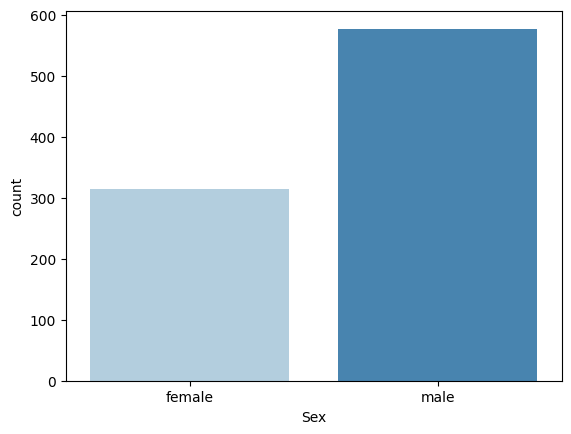

In [6]:
gender_plot = seaborn.countplot(x='Sex', data=titanic_data, palette='Blues', order=['female','male'])

<ipython-input-5-1f972c1ddf0a>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  age_plot = seaborn.histplot(titanic_data['Age'], palette='pastel')


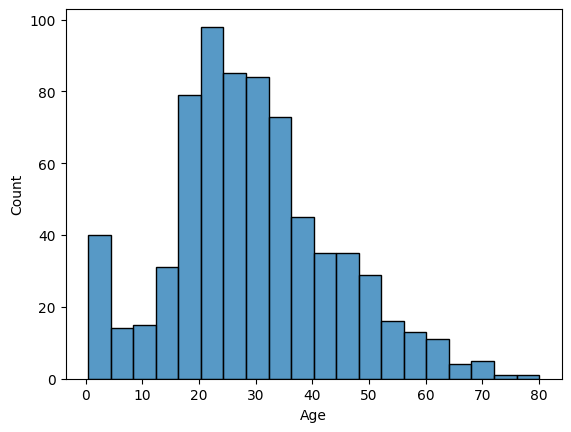

In [ ]:
age_plot = seaborn.histplot(titanic_data['Age'], palette='pastel')

<ipython-input-8-a3433ff6e738>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  class_plot = seaborn.countplot(x='Pclass', data=titanic_data, palette='Blues')


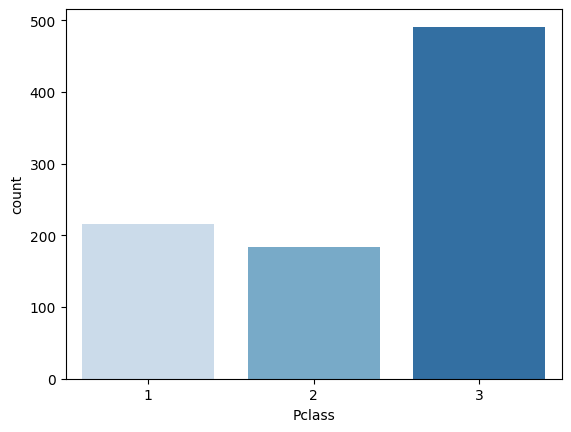

In [8]:
class_plot = seaborn.countplot(x='Pclass', data=titanic_data, palette='Blues')

In [9]:
# analyze data of survivors
Survived_train = titanic_data[titanic_data.Survived == 1]
Survived_train.describe().T


,count,mean,std,min,25%,50%,75%,max
Survived,342.0,1.000000,0.000000,1.00,1.000,1.0,1.0,1.0000
Pclass,342.0,1.950292,0.863321,1.00,1.000,2.0,3.0,3.0000
Age,290.0,28.343690,14.950952,0.42,19.000,28.0,36.0,80.0000
SibSp,342.0,0.473684,0.708688,0.00,0.000,0.0,1.0,4.0000
Parch,342.0,0.464912,0.771712,0.00,0.000,0.0,1.0,5.0000
Fare,342.0,48.395408,66.596998,0.00,12.475,26.0,57.0,512.3292


<ipython-input-47-d97fecf6bf24>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  survives_gender_plot = seaborn.countplot(x='Sex', data=Survived_train, palette='Greens')


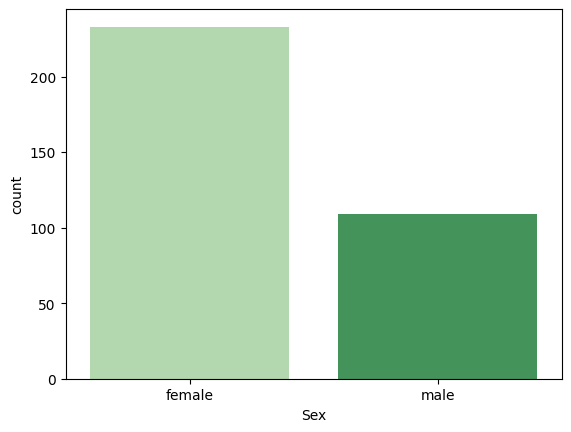

In [ ]:
survives_gender_plot = seaborn.countplot(x='Sex', data=Survived_train, palette='Greens')

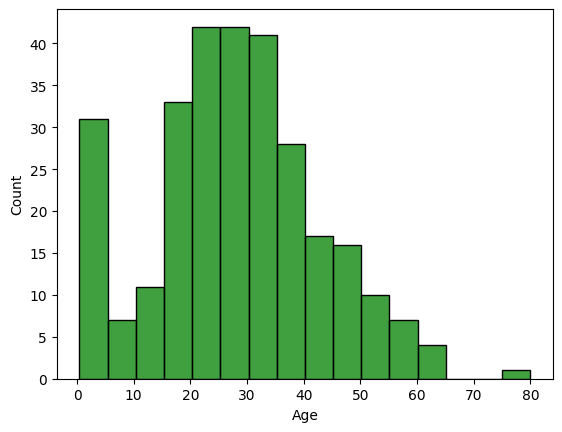

In [10]:
age_plot_survived = seaborn.histplot(Survived_train['Age'], color='green')

<ipython-input-46-6157338abc13>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  survived_class_plot = seaborn.countplot(x='Pclass', data=Survived_train, palette='Greens')


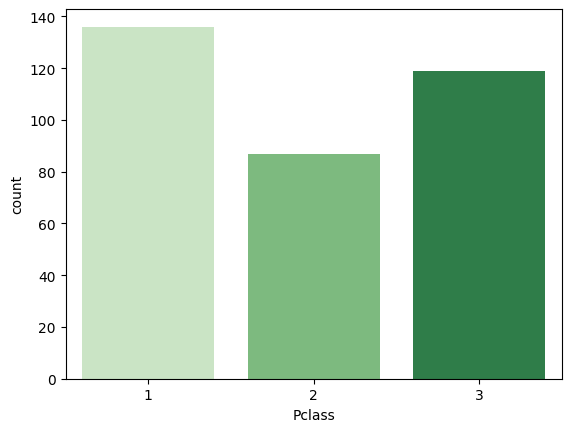

In [ ]:
survived_class_plot = seaborn.countplot(x='Pclass', data=Survived_train, palette='Greens')

In [18]:
''' Part 1. Gender Analysis: Assumption - Females More Likeley to Survive '''

#females

# number of females on board
female_passengers = titanic_data[titanic_data.Sex == 'female']
# count how many females survived
female_survivors = titanic_data[(titanic_data.Survived == 1) & (titanic_data.Sex == 'female')]
# percentage of females that survived
ratio_female_passengers_to_survivors= len(female_survivors)/len(female_passengers)
print("Percent of Female Passengers that Survived:", round(ratio_female_passengers_to_survivors*100,2),"%")

#males

# number of males on board
male_train = titanic_data[titanic_data.Sex == 'male']
# count how many males survived
male_survivors = titanic_data[(titanic_data.Survived == 1) & (titanic_data.Sex == 'male')]
# percentage of males that survived
ratio_male_passengers_to_survivors = len(male_survivors)/len(male_train)
print("Percent of Male Passengers that Survived:", round(ratio_male_passengers_to_survivors*100,2),"%")

if len(female_survivors) > len(male_survivors):
    print('There were more female than male survivors')
else:
    print('There were more male than female survivors')

Percent of Female Passengers that Survived: 74.2 %
Percent of Male Passengers that Survived: 18.89 %
There were more female than male survivors


In [19]:
''' Part 2. Age Analysis: Assumption - Children More Likely to Survive than Adults'''

# girls (under 18)
girls = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age < 18)]
girl_survivors = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Survived == 1) & (titanic_data.Age < 18)]
ratio_girls_to_girl_survivors = len(girl_survivors)/len(girls)
print("Percent of Girls that Survived:", round(ratio_girls_to_girl_survivors*100,2),"%")

# women (over 18)
women = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age >= 18)]
women_survivors = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Survived == 1) & (titanic_data.Age >= 18)]
ratio_women_to_women_survivors = len(women_survivors)/len(women)
print("Percent of Women that Survived:", round(ratio_women_to_women_survivors*100,2),"%")

# boys (under 18)
boys = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age < 18)]
boy_survivors = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Survived == 1) & (titanic_data.Age < 18)]
ratio_boys_to_boy_survivors = len(boy_survivors)/len(boys)
print("Percent of Boys that Survived:", round(ratio_boys_to_boy_survivors*100,2),"%")

# men (over 18)
men = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age >= 18)]
men_survivors = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Survived == 1) & (titanic_data.Age >= 18)]
ratio_men_to_men_survivors = len(men_survivors)/len(men)
print("Percent of Men that Survived:", round(ratio_men_to_men_survivors*100,2),"%")

Percent of Girls that Survived: 69.09 %
Percent of Women that Survived: 77.18 %
Percent of Boys that Survived: 39.66 %
Percent of Men that Survived: 17.72 %


In [20]:
''' Part 3. Class Analysis: Assumption - 1st Class Passengers More Likey to Survive'''
# Count how many 1st class passengers survived
first_class = titanic_data[(titanic_data.Pclass == 1)]
first_class_survivors = titanic_data[(titanic_data.Pclass == 1) & (titanic_data.Survived == 1)]
ratio_firstclass_survivors = len(first_class_survivors)/len(first_class)
print('Percent of 1st Class that Survived:', round(ratio_firstclass_survivors * 100, 2), '%')

# Count survivors in 2nd class
second_class = titanic_data[(titanic_data.Pclass == 2)]
second_class_survivors = titanic_data[(titanic_data.Pclass == 2) & (titanic_data.Survived == 1)]
ratio_secondclass_survivors = len(second_class_survivors) / len(second_class)
print('Percent of 2nd Class that Survived:', round(ratio_secondclass_survivors * 100, 2), '%')

# Count survivors in 3rd class
third_class = titanic_data[(titanic_data.Pclass == 3)]
third_class_survivors = titanic_data[(titanic_data.Pclass == 3) & (titanic_data.Survived == 1)]
ratio_thirdclass_survivors = len(third_class_survivors)/len(third_class)
print('Percent of 3rd Class that Survived', round(ratio_thirdclass_survivors * 100, 2), '%')


Percent of 1st Class that Survived: 62.96 %
Percent of 2nd Class that Survived: 47.28 %
Percent of 3rd Class that Survived 24.24 %


In [21]:
''' What subsets of the cruise population were more likely to survive?  '''

# filter by Class, age, and gender

#first class (women, girls, mean & boys) that survived

women_firstclass = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age > 18) & (titanic_data.Pclass == 1)]
women_furstclass_survivors = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age > 18) & (titanic_data.Pclass == 1) & (titanic_data.Survived == 1)]
ratio_women_firstclass_survivors = len(women_furstclass_survivors)/len(women_firstclass)
print("Percent of First Class Women that Survived:", round(ratio_women_firstclass_survivors*100,2),"%")

girls_firstclass = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age < 18) & (titanic_data.Pclass == 1)]
girls_firstclass_survivors = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age < 18) & (titanic_data.Pclass == 1) & (titanic_data.Survived == 1)]
ratio_girls_firstclass_survivors = len(girls_firstclass_survivors)/len(girls_firstclass)
print("Percent of First Class Girls that Survived:", round(ratio_girls_firstclass_survivors*100,2),"%")

men_firstclass = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age > 18) & (titanic_data.Pclass == 1)]
men_firstclass_survivors = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age > 18) & (titanic_data.Pclass == 1) & (titanic_data.Survived == 1)]
ratio_men_firstclass_survivors = len(men_firstclass_survivors)/len(men_firstclass)
print("Percent of First Class Men that Survived:", round(ratio_men_firstclass_survivors*100,2),"%")

boys_firstclass = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age < 18) & (titanic_data.Pclass == 1)]
boys_firstclass_survivors = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age < 18) & (titanic_data.Pclass == 1) & (titanic_data.Survived == 1)]
ratio_boys_firstclass_survivors = len(boys_firstclass_survivors)/len(boys_firstclass)
print("Percent of First Class Boys that Survived:", round(ratio_boys_firstclass_survivors*100,2),"%")

#second class (women, girls, mean & boys) that survived
women_secondclass = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age > 18) & (titanic_data.Pclass == 2)]
women_secondclass_survivors = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age > 18) & (titanic_data.Pclass == 2) & (titanic_data.Survived == 1)]
ratio_women_secondclass_survivors = len(women_secondclass_survivors)/len(women_secondclass)
print("Percent of Second Class Women that Survived:", round(ratio_women_secondclass_survivors*100,2),"%")

girls_secondclass = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age < 18) & (titanic_data.Pclass == 2)]
girls_secondclass_survivors = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age < 18) & (titanic_data.Pclass == 2) & (titanic_data.Survived == 1)]
ratio_girls_secondclass_survivors = len(girls_secondclass_survivors)/len(girls_secondclass)
print("Percent of Second Class Girls that Survived:", round(ratio_girls_secondclass_survivors*100,2),"%")

men_secondclass = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age > 18) & (titanic_data.Pclass == 2)]
men_secondclass_survivors = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age > 18) & (titanic_data.Pclass == 2) & (titanic_data.Survived == 1)]
ratio_men_secondclass_survivors = len(men_secondclass_survivors)/len(men_secondclass)
print("Percent of Second Class Men that Survived:", round(ratio_men_secondclass_survivors*100,2),"%")

boys_secondclass = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age < 18) & (titanic_data.Pclass == 2)]
boys_second_survivors = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age < 18) & (titanic_data.Pclass == 2) & (titanic_data.Survived == 1)]
ratio_boys_secondclass_survivors = len(boys_second_survivors)/len(boys_secondclass)
print("Percent of Second Class Boys that Survived:", round(ratio_boys_secondclass_survivors*100,2),"%")

#third class (women, girls, mean & boys) that survived
women_thirdclass = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age > 18) & (titanic_data.Pclass == 3)]
women_thirdclass_survivors = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age > 18) & (titanic_data.Pclass == 3) & (titanic_data.Survived == 1)]
ratio_women_thirdclass_survivors = len(women_thirdclass_survivors)/len(women_thirdclass)
print("Percent of Third Class Women that Survived:", round(ratio_women_thirdclass_survivors*100,2),"%")

girls_thirdclass = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age < 18) & (titanic_data.Pclass == 3)]
girls_thirdclass_survivors = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.Age < 18) & (titanic_data.Pclass == 3) & (titanic_data.Survived == 1)]
ratio_girls_thirdclass_survivors = len(girls_thirdclass_survivors)/len(girls_thirdclass)
print("Percent of Third Class Girls that Survived:", round(ratio_girls_thirdclass_survivors*100,2),"%")

men_thirdclass = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age > 18) & (titanic_data.Pclass == 3)]
men_thirdclass_survivors = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age > 18) & (titanic_data.Pclass == 3) & (titanic_data.Survived == 1)]
ratio_men_thirdclass_survivors = len(men_thirdclass_survivors)/len(men_thirdclass)
print("Percent of Third Class Men that Survived:", round(ratio_men_thirdclass_survivors*100,2),"%")

boys_thirdclass = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age < 18) & (titanic_data.Pclass == 3)]
boys_thirdclass_survivors = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age < 18) & (titanic_data.Pclass == 3) & (titanic_data.Survived == 1)]
ratio_boys_thirdclass_survivors = len(boys_thirdclass_survivors)/len(boys_thirdclass)
print("Percent of Third Class Boys that Survived:", round(ratio_boys_thirdclass_survivors*100,2),"%")


Percent of First Class Women that Survived: 97.3 %
Percent of First Class Girls that Survived: 87.5 %
Percent of First Class Men that Survived: 37.5 %
Percent of First Class Boys that Survived: 100.0 %
Percent of Second Class Women that Survived: 90.0 %
Percent of Second Class Girls that Survived: 100.0 %
Percent of Second Class Men that Survived: 7.14 %
Percent of Second Class Boys that Survived: 81.82 %
Percent of Third Class Women that Survived: 42.37 %
Percent of Third Class Girls that Survived: 54.29 %
Percent of Third Class Men that Survived: 13.37 %
Percent of Third Class Boys that Survived: 23.26 %


In [22]:
# new dictionary featuring findings

findings = {
    'Demographic' : ['Women','Girls','Men','Boys', 'Women','Girls','Men','Boys','Women','Girls','Men','Boys'],
    'Class' : [1,1,1,1,2,2,2,2,3,3,3,3],
    'Percent of Survival' : [97.3, 87.5, 37.5, 100, 90, 100, 7.14, 81.82, 42.37, 54.29, 13.37, 23.26]
}


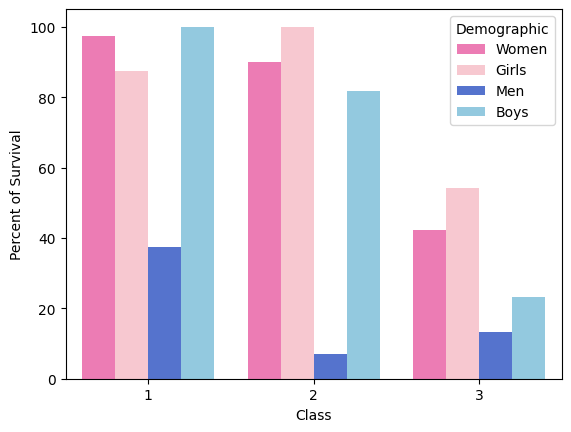

In [23]:
summary_statistics = seaborn.barplot(findings, x="Class",y="Percent of Survival", hue="Demographic", palette={'Women': 'hotpink', 'Girls': 'pink', 'Men': 'royalblue', 'Boys': 'skyblue'})